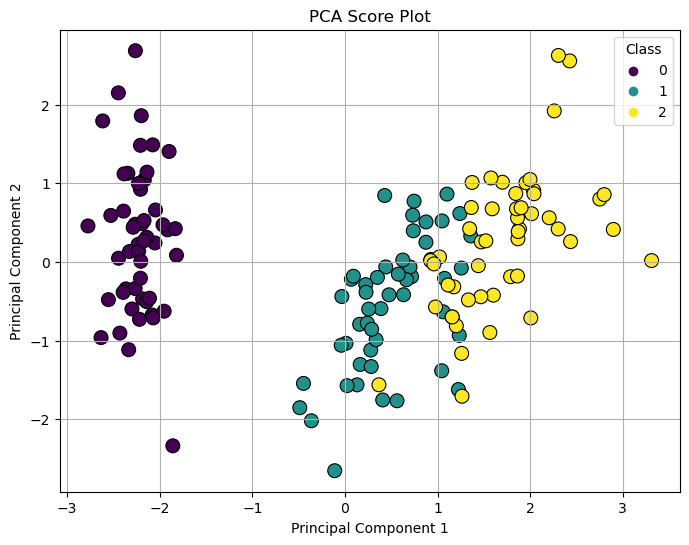

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Load the Iris dataset
iris = load_iris()
X = iris.data  # Features
y = iris.target  # Target labels

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Fit PCA model with 2 components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Plot the PCA score plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y, palette='viridis', s=100, edgecolor='k')
plt.title('PCA Score Plot')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Class')
plt.grid(True)
plt.show()



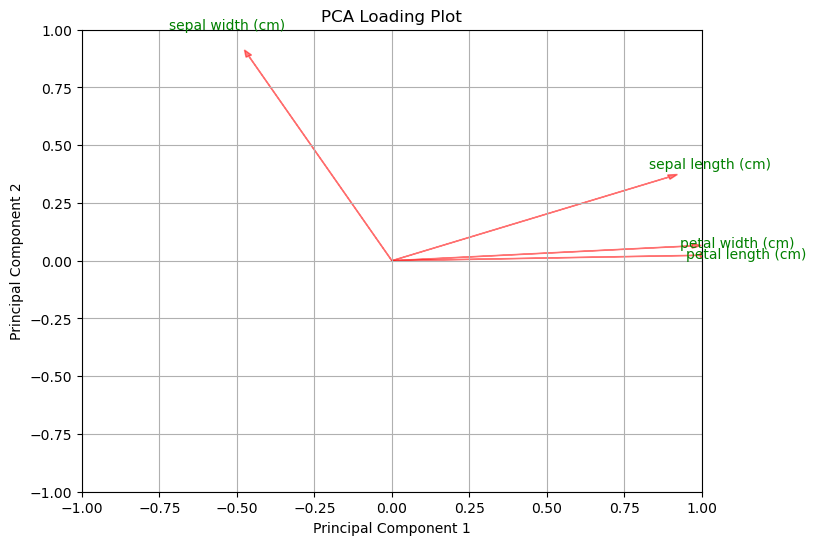

In [2]:
# Get the loadings (eigenvectors)
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

# Plot the PCA loading plot
plt.figure(figsize=(8, 6))
for i, feature in enumerate(iris.feature_names):
    plt.arrow(0, 0, loadings[i, 0], loadings[i, 1], color='r', alpha=0.5, head_width=0.02)
    plt.text(loadings[i, 0] * 1.15, loadings[i, 1] * 1.15, feature, color='g', ha='center', va='center')

plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Loading Plot')
plt.grid()
plt.show()


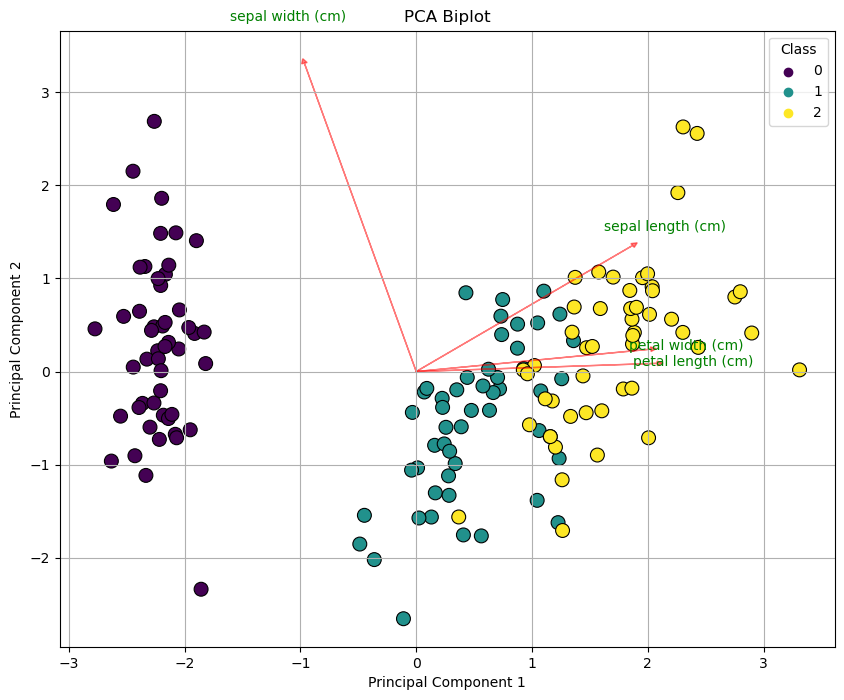

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Load the Iris dataset
iris = load_iris()
X = iris.data  # Features
y = iris.target  # Target labels

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Fit PCA model with 2 components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Calculate the loadings (eigenvectors)
loadings = pca.components_.T

# Scale the loadings to have equal size for the plot
# Find maximum absolute value in scores for normalization
scaling_factor = np.max(np.abs(X_pca)) / np.max(np.abs(loadings))

# Scale loadings
loadings_scaled = loadings * scaling_factor

# Create the biplot
plt.figure(figsize=(10, 8))

# Plot the PCA score plot (observations)
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y, palette='viridis', s=100, edgecolor='k')
plt.title('PCA Biplot')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# Plot the PCA loading plot (variables)
for i, feature in enumerate(iris.feature_names):
    plt.arrow(0, 0, loadings_scaled[i, 0], loadings_scaled[i, 1], color='r', alpha=0.5, head_width=0.05, head_length=0.05)
    plt.text(loadings_scaled[i, 0] * 1.15, loadings_scaled[i, 1] * 1.15, feature, color='g', ha='center', va='center')

plt.grid(True)
plt.legend(title='Class')
plt.show()
